# Company Bankruptcy Prediction

This is a classification project to predict the bankruptcy of a company given certain financial information. It involves the use of several supervised machine learning algorithms. The processes in this project are outlined below:

- Import Data and Data Summary


- Data Cleaning


- Data Exploration I - Dependent Variable


- Feature Selection
    - Train Test Split
    - Recursive Feature Elimination
    
    
 - Data Exploration II - Independent Variables (from Feature Selection)
 
 
 - Data Preprocessing 
     - Oversampling - SMOTE (Dealing with Unbalanced Dataset)
     - Feature Scaling
     
     
 - Model Training and Testing
     - Logistic Regression
     - K Nearest Neighbor
     - Support Vector Classifier
     - Decision Tree Classifier
     - Random Forest Classifier
     - XGBoost Classifier
     
    
 - Model Comparison & Conclusion
 
 
 The data can be onbtained on Kaggle at https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction
 
 
 The dataset contains 95 financial ratios of over 6,800 companies
 
 
 

   



### Import Libraries, Import Data, Data Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [2]:
df = pd.read_csv('Bankruptcy Data.csv')

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.shape

(6819, 96)

######   

## Data Cleaning

In [7]:
# Check for null values

df.isnull().sum().sort_values().tail()


 Regular Net Profit Growth Rate      0
 After-tax Net Profit Growth Rate    0
 Operating Profit Growth Rate        0
 Net Income Flag                     0
 Equity to Liability                 0
dtype: int64

In [8]:
# Check for duplicated values

df.duplicated().sum()

0

In [9]:
# Determining if there are any categorical variables that will need to be encoded for the algorithms

categorical_variables = df.dtypes[(df.dtypes != 'int64') & (df.dtypes != 'float')].index

df[categorical_variables].columns.tolist()

[]

In [10]:
# Check to see if there are columns with a single value for all instances

for x in df.columns:
    if len(df[x].value_counts())==1:
        print(x)

 Net Income Flag


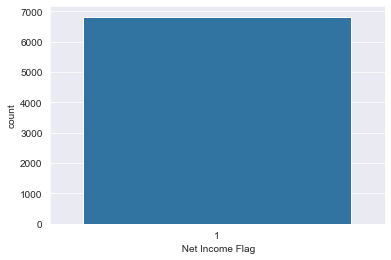

In [11]:
plt.figure()
sns.countplot(data=df, x=' Net Income Flag')

In [12]:
# Drop the ' Net Income Flag' column since it is the same value for all observations in the dataset

df.drop(' Net Income Flag', axis=1, inplace=True)

From the correlation matrix above ' Net Value Per Share (A)', ' Net Value Per Share (B)', and ' Net Value Per Share (C) appear to have similar correlation to other variables. I will check if these columns are the same for most of the dataset

In [13]:
len(df[(df[' Net Value Per Share (A)'] == df[' Net Value Per Share (B)']) & 
     (df[' Net Value Per Share (A)'] == df[' Net Value Per Share (C)'])])

6681

In [14]:
# I will drop two of the Net Value Per Share columns as they all have the same values for over 95% of all instances

df.drop([' Net Value Per Share (A)',' Net Value Per Share (C)'], axis=1, inplace=True)

######    

## Data Exploration I - Dependent Variable

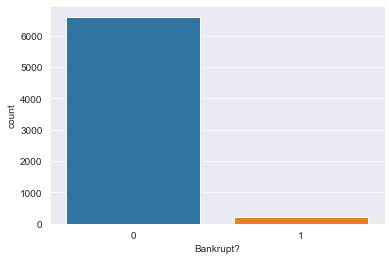

In [15]:
# Distribution of Dependent Variable

sns.countplot(data=df, x='Bankrupt?')

In [16]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

The dataset is highly imbalanced. I will keep this is mind in doing the train-test split and modelling

### Independent Variables
As we have too many independent variables, I will do feature selection for the most importance variables. Then, I can explore only the variables that are important in this prediction 

#####   

## Feature Selection

I will first split the data into training and testing sets before the feature selection to determing the most important variables for the prediction

The splitting is done before the feature selection because I want to ensure the test sets acts as unseen data and does not go into consideration in my selection of the most importance features

#### Split Data into Train and Test sets

In [17]:
# First define X and y

X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [18]:
# Splitting the train and test sets in ratio 80:20
# It is important to stratify the y variable as the dataset is highly unbalanced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Bankrupt?'], random_state=1)

#### Recursive Feature Elimination
There are so many independent variables (98 variables), I will select the most important features relevant for the prediction

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

sel = SelectFromModel(model)

sel.fit(X_train, y_train)

selected_features = X_train.columns[(sel.get_support())]
rfe_len = len(selected_features)
rfe_len

32

In [20]:
selected_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Fixed Assets Turnover Frequency',
       ' Operating profit per person', ' Cash/Total Assets',
       ' Cash/Current Liability', ' Inventory/Working Capital',
       ' Working Capital/Equity', ' Total income/Total expense',
       ' Net Income to Total Assets', ' No-credit Interval',

In [21]:
model.feature_importances_

array([0.01498559, 0.01082855, 0.01317333, 0.00576415, 0.0083175 ,
       0.00717945, 0.0084896 , 0.01216636, 0.01797274, 0.0135691 ,
       0.00959104, 0.00888709, 0.00697305, 0.01506944, 0.00099384,
       0.02706597, 0.0321724 , 0.00562227, 0.00595121, 0.0066578 ,
       0.01543447, 0.00858783, 0.00746006, 0.00778847, 0.00674695,
       0.00753768, 0.00639337, 0.03700317, 0.00615359, 0.00614441,
       0.0068571 , 0.01199571, 0.01827598, 0.0146693 , 0.01625467,
       0.01939319, 0.00793375, 0.02134711, 0.0051641 , 0.00740239,
       0.0216141 , 0.00814201, 0.00490172, 0.01195124, 0.00959952,
       0.01024441, 0.0114274 , 0.00722428, 0.01011554, 0.01097314,
       0.00911863, 0.00959169, 0.00850184, 0.00825346, 0.01746913,
       0.00785356, 0.01385755, 0.00634464, 0.00588083, 0.01492507,
       0.00535918, 0.00671905, 0.01569989, 0.00629023, 0.00554369,
       0.00946216, 0.01257258, 0.00642108, 0.00884953, 0.00943717,
       0.00779165, 0.00799249, 0.00810444, 0.00797065, 0.00783

In [22]:
rfe_df = pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False).head(rfe_len)
rfe_df.columns = ['Feature Importance']
rfe_df

,Feature Importance
Net Value Growth Rate,0.037003
Persistent EPS in the Last Four Seasons,0.032172
Net Income to Stockholder's Equity,0.031310
Net Value Per Share (B),0.027066
Net profit before tax/Paid-in capital,0.021614
Borrowing dependency,0.021347
Net worth/Assets,0.019393
Interest Expense Ratio,0.018276
Non-industry income and expenditure/revenue,0.017973
Cash/Total Assets,0.017469


These are the most important features for the prediction models

In [23]:
# Creating Train and Test sets that includes only the selected features

Xtrain_sel = X_train[selected_features]
Xtest_sel = X_test[selected_features]

#####     

## Data Exploration II - Independent Variables

In [24]:
eda_features = list(selected_features)
eda_features.append('Bankrupt?')
eda_features
df2 = df[eda_features]

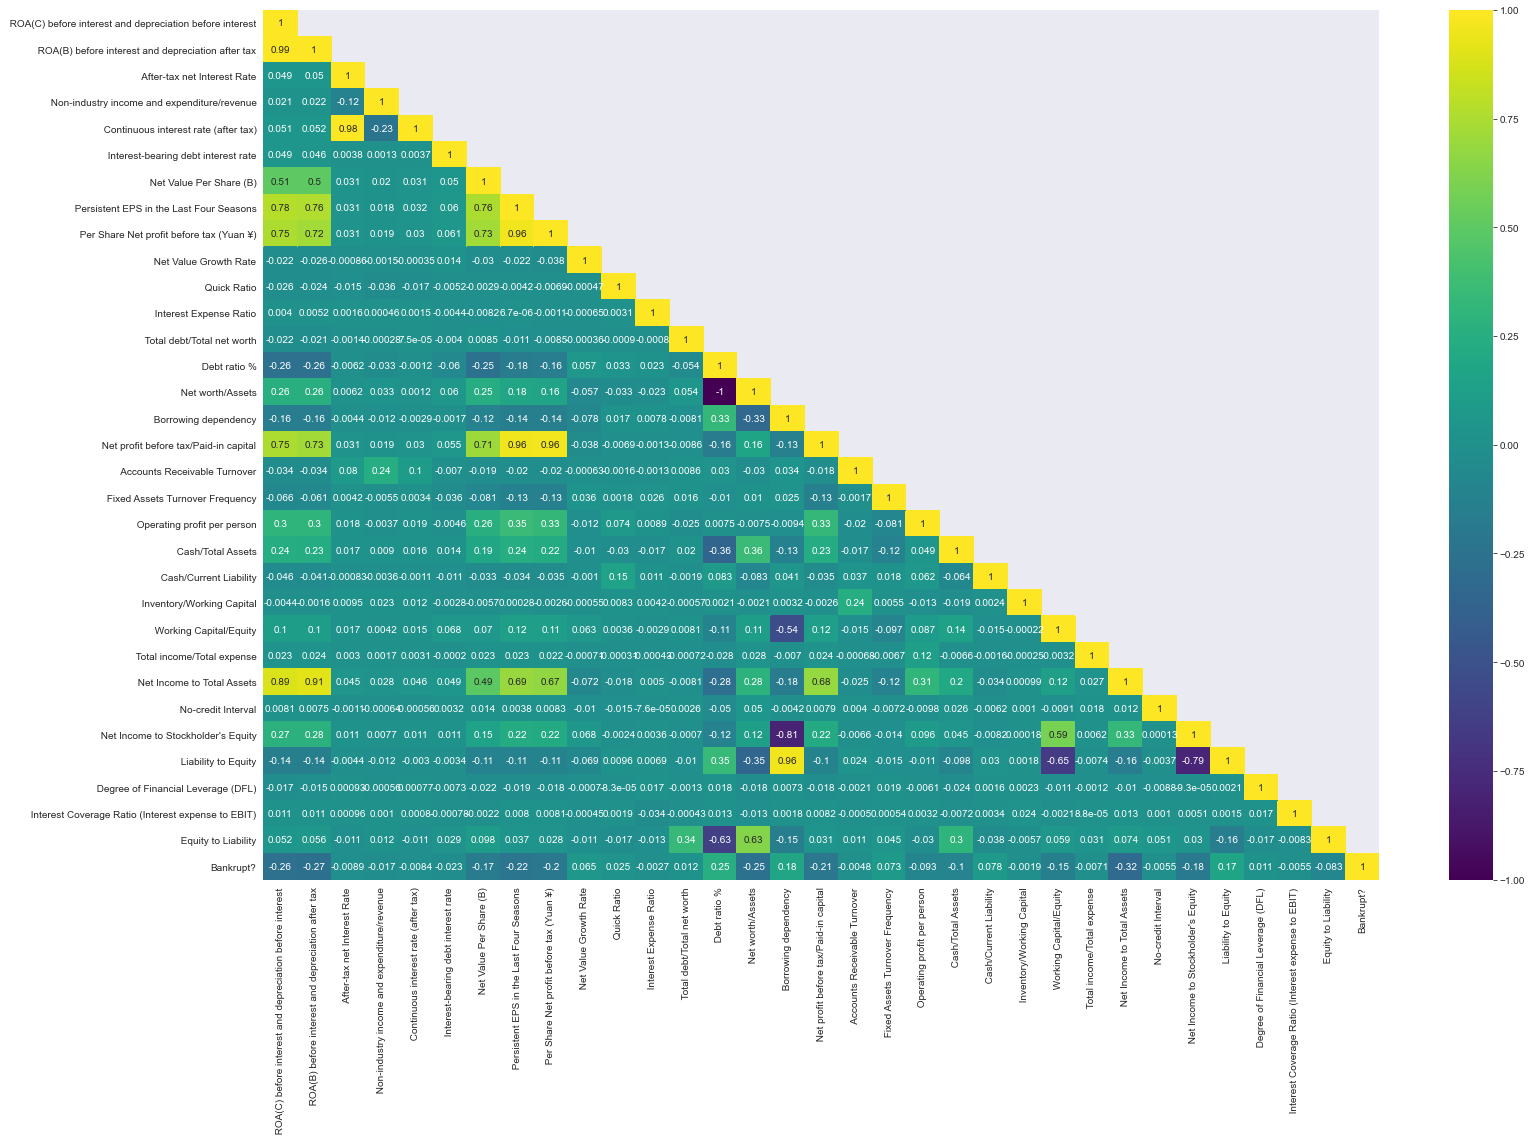

In [25]:
plt.figure(figsize=(25,16))
sns.heatmap(df2.corr(), annot=True, cmap='viridis', mask=np.triu(df2.corr(),+1))

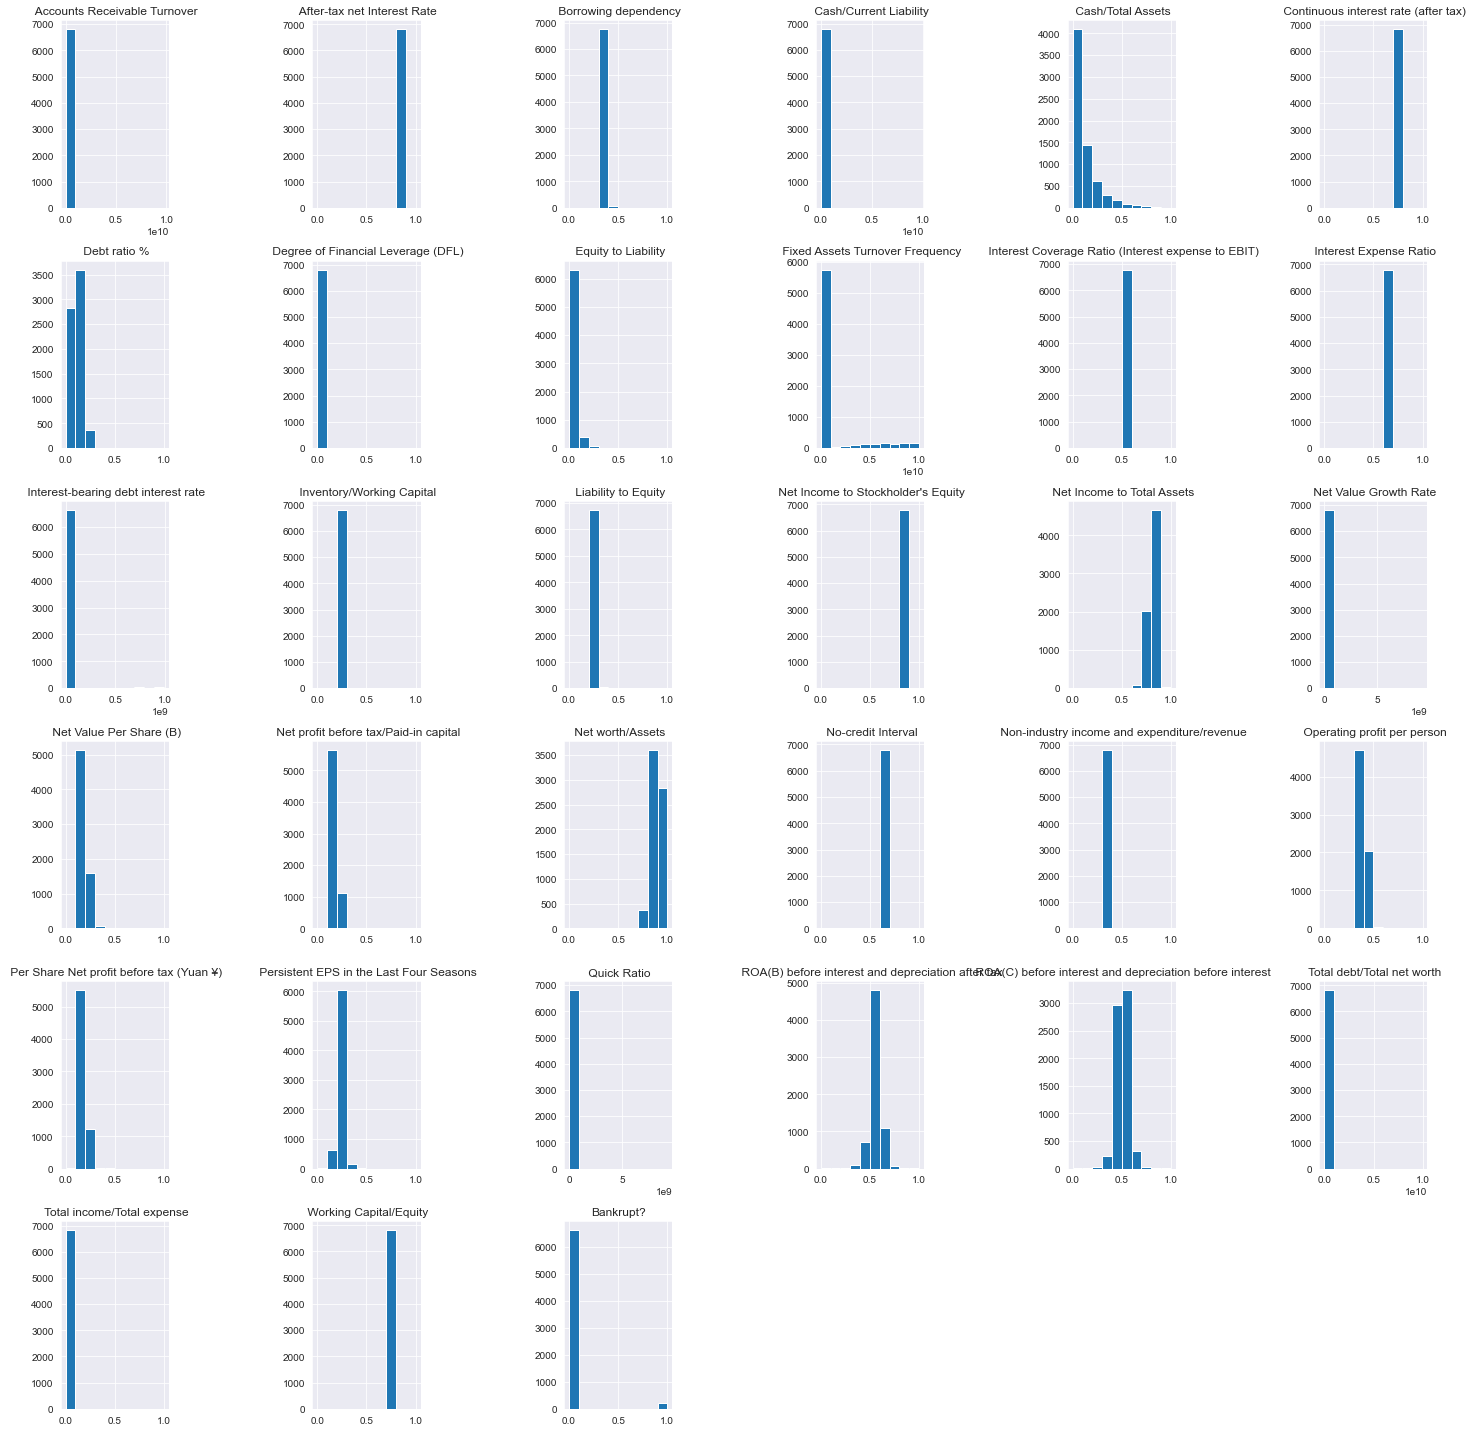

In [26]:
df2.hist(figsize=(20,20))
plt.tight_layout()

#####    

## Data Preprocessing

####  Oversampling - Dealing with an unbalanced dataset

In [27]:
# I am only going to apply smote (oversampling) to the training dataset

oversample = SMOTE()
X_train_rfe, y_train =oversample.fit_resample(Xtrain_sel,y_train)


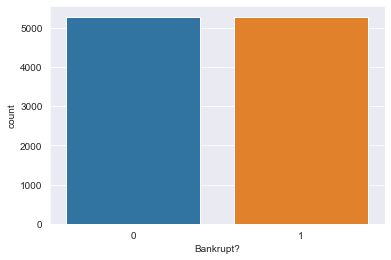

In [28]:
sns.countplot(y_train)

#### Feature Scaling

In [29]:
# I am only going to scale the independent variables. The dependent variable includes on 0s and 1s

sc_x = StandardScaler()

X_train_scaled = sc_x.fit_transform(X_train_rfe)
X_test_scaled = sc_x.fit_transform(Xtest_sel)

#####   

## Model Training and Testing

The classification algorithms to be used for this prediction are Logistic Regression, K Nearest Neighbors, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier

### Logistics Regression

In [30]:
logreg = LogisticRegression(max_iter=1000)

In [31]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [32]:
logreg_pred = logreg.predict(X_test_scaled)

In [33]:
print(confusion_matrix(y_test,logreg_pred))
print('\n')
print(classification_report(y_test,logreg_pred))

[[700 620]
 [  1  43]]


              precision    recall  f1-score   support

           0       1.00      0.53      0.69      1320
           1       0.06      0.98      0.12        44

    accuracy                           0.54      1364
   macro avg       0.53      0.75      0.41      1364
weighted avg       0.97      0.54      0.67      1364



### K Nearest Neighbors

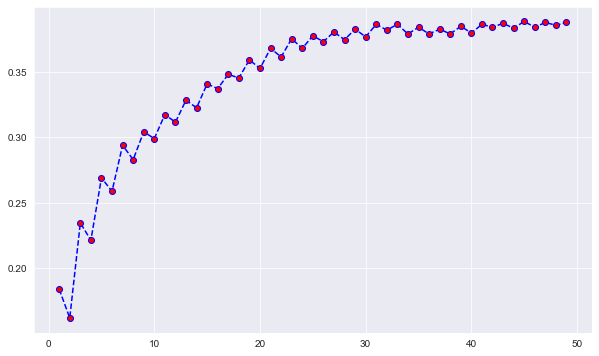

In [34]:
# Using a loop to find the optimal n_neighbors

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red')

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)

In [36]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
knn_pred = knn.predict(X_test_scaled)

In [38]:
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[1112  208]
 [  13   31]]


              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1320
           1       0.13      0.70      0.22        44

    accuracy                           0.84      1364
   macro avg       0.56      0.77      0.56      1364
weighted avg       0.96      0.84      0.89      1364



### Support Vector Classifier

In [39]:
svc = SVC()

In [40]:
svc.fit(X_train_scaled, y_train)

SVC()

In [41]:
svc_pred = svc.predict(X_test_scaled)

In [42]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[722 598]
 [  6  38]]


              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1320
           1       0.06      0.86      0.11        44

    accuracy                           0.56      1364
   macro avg       0.53      0.71      0.41      1364
weighted avg       0.96      0.56      0.69      1364



### Decision Tree Classifier

In [43]:
dtc = DecisionTreeClassifier()

In [44]:
dtc.fit(X_train_rfe, y_train)

DecisionTreeClassifier()

In [45]:
dtc_pred = dtc.predict(Xtest_sel)

In [46]:
print(confusion_matrix(y_test,dtc_pred))
print('\n')
print(classification_report(y_test,dtc_pred))

[[1255   65]
 [  19   25]]


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1320
           1       0.28      0.57      0.37        44

    accuracy                           0.94      1364
   macro avg       0.63      0.76      0.67      1364
weighted avg       0.96      0.94      0.95      1364



### Random Forest Classifier

In [47]:
rfc = RandomForestClassifier()

In [48]:
rfc.fit(X_train_rfe, y_train)

RandomForestClassifier()

In [49]:
rfc_pred = rfc.predict(Xtest_sel)

In [50]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[1280   40]
 [  22   22]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.35      0.50      0.42        44

    accuracy                           0.95      1364
   macro avg       0.67      0.73      0.70      1364
weighted avg       0.96      0.95      0.96      1364



### XGBoost Classifier

In [51]:
xgb = XGBClassifier(use_label_encoder=False)

In [52]:
xgb.fit(X_train_rfe, y_train)

[07:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
xgb_pred = xgb.predict(Xtest_sel)

In [54]:
print(confusion_matrix(y_test,xgb_pred))
print('\n')
print(classification_report(y_test,xgb_pred))

[[1296   24]
 [  23   21]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.47      0.48      0.47        44

    accuracy                           0.97      1364
   macro avg       0.72      0.73      0.73      1364
weighted avg       0.97      0.97      0.97      1364



### Cat Boost Classifier

In [55]:
cbc = CatBoostClassifier()

In [56]:
cbc.fit(X_train_rfe, y_train)

Learning rate set to 0.028184
0:	learn: 0.6597467	total: 187ms	remaining: 3m 7s
1:	learn: 0.6254980	total: 203ms	remaining: 1m 41s
2:	learn: 0.5967234	total: 218ms	remaining: 1m 12s
3:	learn: 0.5698817	total: 231ms	remaining: 57.4s
4:	learn: 0.5406869	total: 242ms	remaining: 48.2s
5:	learn: 0.5169752	total: 254ms	remaining: 42.1s
6:	learn: 0.4952594	total: 267ms	remaining: 37.9s
7:	learn: 0.4755155	total: 280ms	remaining: 34.7s
8:	learn: 0.4576598	total: 292ms	remaining: 32.2s
9:	learn: 0.4422146	total: 305ms	remaining: 30.2s
10:	learn: 0.4263269	total: 317ms	remaining: 28.5s
11:	learn: 0.4115137	total: 330ms	remaining: 27.1s
12:	learn: 0.3992749	total: 342ms	remaining: 25.9s
13:	learn: 0.3866586	total: 353ms	remaining: 24.9s
14:	learn: 0.3770288	total: 366ms	remaining: 24.1s
15:	learn: 0.3674470	total: 380ms	remaining: 23.4s
16:	learn: 0.3576808	total: 394ms	remaining: 22.8s
17:	learn: 0.3489521	total: 407ms	remaining: 22.2s
18:	learn: 0.3409421	total: 420ms	remaining: 21.7s
19:	learn

163:	learn: 0.1319192	total: 2.77s	remaining: 14.1s
164:	learn: 0.1313988	total: 2.78s	remaining: 14.1s
165:	learn: 0.1311648	total: 2.8s	remaining: 14.1s
166:	learn: 0.1307013	total: 2.81s	remaining: 14s
167:	learn: 0.1302934	total: 2.83s	remaining: 14s
168:	learn: 0.1296933	total: 2.85s	remaining: 14s
169:	learn: 0.1293769	total: 2.86s	remaining: 14s
170:	learn: 0.1290783	total: 2.88s	remaining: 13.9s
171:	learn: 0.1285121	total: 2.89s	remaining: 13.9s
172:	learn: 0.1281418	total: 2.91s	remaining: 13.9s
173:	learn: 0.1276405	total: 2.92s	remaining: 13.9s
174:	learn: 0.1272635	total: 2.94s	remaining: 13.9s
175:	learn: 0.1269795	total: 2.96s	remaining: 13.9s
176:	learn: 0.1263885	total: 2.98s	remaining: 13.9s
177:	learn: 0.1260847	total: 3.04s	remaining: 14s
178:	learn: 0.1255560	total: 3.08s	remaining: 14.1s
179:	learn: 0.1251108	total: 3.13s	remaining: 14.2s
180:	learn: 0.1247767	total: 3.15s	remaining: 14.3s
181:	learn: 0.1243569	total: 3.2s	remaining: 14.4s
182:	learn: 0.1240135	to

329:	learn: 0.0844415	total: 5.96s	remaining: 12.1s
330:	learn: 0.0842071	total: 5.98s	remaining: 12.1s
331:	learn: 0.0839649	total: 5.99s	remaining: 12.1s
332:	learn: 0.0836192	total: 6.01s	remaining: 12s
333:	learn: 0.0834418	total: 6.02s	remaining: 12s
334:	learn: 0.0831137	total: 6.04s	remaining: 12s
335:	learn: 0.0829455	total: 6.06s	remaining: 12s
336:	learn: 0.0827362	total: 6.07s	remaining: 11.9s
337:	learn: 0.0825059	total: 6.09s	remaining: 11.9s
338:	learn: 0.0822166	total: 6.11s	remaining: 11.9s
339:	learn: 0.0820579	total: 6.13s	remaining: 11.9s
340:	learn: 0.0816965	total: 6.14s	remaining: 11.9s
341:	learn: 0.0815307	total: 6.16s	remaining: 11.9s
342:	learn: 0.0812536	total: 6.18s	remaining: 11.8s
343:	learn: 0.0810869	total: 6.19s	remaining: 11.8s
344:	learn: 0.0808392	total: 6.21s	remaining: 11.8s
345:	learn: 0.0805792	total: 6.22s	remaining: 11.8s
346:	learn: 0.0803294	total: 6.24s	remaining: 11.7s
347:	learn: 0.0801688	total: 6.25s	remaining: 11.7s
348:	learn: 0.080037

492:	learn: 0.0562665	total: 8.7s	remaining: 8.95s
493:	learn: 0.0562147	total: 8.72s	remaining: 8.93s
494:	learn: 0.0561003	total: 8.74s	remaining: 8.92s
495:	learn: 0.0559082	total: 8.77s	remaining: 8.91s
496:	learn: 0.0557949	total: 8.79s	remaining: 8.89s
497:	learn: 0.0555846	total: 8.81s	remaining: 8.88s
498:	learn: 0.0554770	total: 8.83s	remaining: 8.87s
499:	learn: 0.0552586	total: 8.86s	remaining: 8.86s
500:	learn: 0.0551276	total: 8.89s	remaining: 8.85s
501:	learn: 0.0550827	total: 8.91s	remaining: 8.84s
502:	learn: 0.0549879	total: 8.94s	remaining: 8.83s
503:	learn: 0.0548673	total: 8.96s	remaining: 8.81s
504:	learn: 0.0546305	total: 8.98s	remaining: 8.8s
505:	learn: 0.0544344	total: 9s	remaining: 8.79s
506:	learn: 0.0542545	total: 9.02s	remaining: 8.77s
507:	learn: 0.0540744	total: 9.04s	remaining: 8.75s
508:	learn: 0.0539251	total: 9.05s	remaining: 8.73s
509:	learn: 0.0538276	total: 9.07s	remaining: 8.71s
510:	learn: 0.0536662	total: 9.08s	remaining: 8.69s
511:	learn: 0.053

657:	learn: 0.0384918	total: 11.3s	remaining: 5.85s
658:	learn: 0.0383360	total: 11.3s	remaining: 5.83s
659:	learn: 0.0382619	total: 11.3s	remaining: 5.81s
660:	learn: 0.0382167	total: 11.3s	remaining: 5.79s
661:	learn: 0.0381035	total: 11.3s	remaining: 5.77s
662:	learn: 0.0380258	total: 11.3s	remaining: 5.75s
663:	learn: 0.0379462	total: 11.3s	remaining: 5.74s
664:	learn: 0.0378732	total: 11.4s	remaining: 5.72s
665:	learn: 0.0377760	total: 11.4s	remaining: 5.7s
666:	learn: 0.0376323	total: 11.4s	remaining: 5.68s
667:	learn: 0.0375928	total: 11.4s	remaining: 5.67s
668:	learn: 0.0375590	total: 11.4s	remaining: 5.65s
669:	learn: 0.0375087	total: 11.4s	remaining: 5.63s
670:	learn: 0.0374473	total: 11.4s	remaining: 5.61s
671:	learn: 0.0372874	total: 11.5s	remaining: 5.59s
672:	learn: 0.0372688	total: 11.5s	remaining: 5.57s
673:	learn: 0.0371860	total: 11.5s	remaining: 5.55s
674:	learn: 0.0371084	total: 11.5s	remaining: 5.54s
675:	learn: 0.0370907	total: 11.5s	remaining: 5.52s
676:	learn: 0

818:	learn: 0.0282471	total: 13.7s	remaining: 3.02s
819:	learn: 0.0281819	total: 13.7s	remaining: 3s
820:	learn: 0.0281649	total: 13.7s	remaining: 2.98s
821:	learn: 0.0281183	total: 13.7s	remaining: 2.97s
822:	learn: 0.0280564	total: 13.7s	remaining: 2.95s
823:	learn: 0.0280071	total: 13.7s	remaining: 2.93s
824:	learn: 0.0279771	total: 13.7s	remaining: 2.91s
825:	learn: 0.0279429	total: 13.8s	remaining: 2.9s
826:	learn: 0.0278782	total: 13.8s	remaining: 2.88s
827:	learn: 0.0277851	total: 13.8s	remaining: 2.86s
828:	learn: 0.0277478	total: 13.8s	remaining: 2.85s
829:	learn: 0.0276905	total: 13.8s	remaining: 2.83s
830:	learn: 0.0276756	total: 13.8s	remaining: 2.81s
831:	learn: 0.0276459	total: 13.8s	remaining: 2.79s
832:	learn: 0.0275840	total: 13.9s	remaining: 2.78s
833:	learn: 0.0275579	total: 13.9s	remaining: 2.76s
834:	learn: 0.0274723	total: 13.9s	remaining: 2.75s
835:	learn: 0.0274580	total: 13.9s	remaining: 2.73s
836:	learn: 0.0274059	total: 13.9s	remaining: 2.71s
837:	learn: 0.02

981:	learn: 0.0205932	total: 16s	remaining: 294ms
982:	learn: 0.0205477	total: 16.1s	remaining: 278ms
983:	learn: 0.0205081	total: 16.1s	remaining: 261ms
984:	learn: 0.0204496	total: 16.1s	remaining: 245ms
985:	learn: 0.0204072	total: 16.1s	remaining: 229ms
986:	learn: 0.0203917	total: 16.1s	remaining: 212ms
987:	learn: 0.0203819	total: 16.1s	remaining: 196ms
988:	learn: 0.0203483	total: 16.1s	remaining: 179ms
989:	learn: 0.0203336	total: 16.1s	remaining: 163ms
990:	learn: 0.0202903	total: 16.2s	remaining: 147ms
991:	learn: 0.0202751	total: 16.2s	remaining: 130ms
992:	learn: 0.0202651	total: 16.2s	remaining: 114ms
993:	learn: 0.0202556	total: 16.2s	remaining: 97.7ms
994:	learn: 0.0201856	total: 16.2s	remaining: 81.4ms
995:	learn: 0.0201602	total: 16.2s	remaining: 65.1ms
996:	learn: 0.0201525	total: 16.2s	remaining: 48.8ms
997:	learn: 0.0201097	total: 16.2s	remaining: 32.5ms
998:	learn: 0.0200709	total: 16.3s	remaining: 16.3ms
999:	learn: 0.0200486	total: 16.3s	remaining: 0us


In [57]:
cbc_pred = cbc.predict(Xtest_sel)
cbc_model = pd.DataFrame({"True Values":y_test, "Predicted Values":cbc_pred})

In [58]:
print(confusion_matrix(y_test,cbc_pred))
print('\n')
print(classification_report(y_test,cbc_pred))

[[1292   28]
 [  21   23]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.45      0.52      0.48        44

    accuracy                           0.96      1364
   macro avg       0.72      0.75      0.73      1364
weighted avg       0.97      0.96      0.97      1364



### Gradient Boosting Classifier

In [59]:
gbc = GradientBoostingClassifier()

In [60]:
gbc.fit(X_train_rfe, y_train)

GradientBoostingClassifier()

In [61]:
gbc_pred = gbc.predict(Xtest_sel)
gbc_model = pd.DataFrame({"True Values":y_test, "Predicted Values":gbc_pred})

In [62]:
print(confusion_matrix(y_test,gbc_pred))
print('\n')
print(classification_report(y_test,gbc_pred))

[[1226   94]
 [  14   30]]


              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.24      0.68      0.36        44

    accuracy                           0.92      1364
   macro avg       0.62      0.81      0.66      1364
weighted avg       0.96      0.92      0.94      1364



### Ada Boost Classifier

In [63]:
abc = AdaBoostClassifier()

In [64]:
abc.fit(X_train_rfe, y_train)

AdaBoostClassifier()

In [65]:
abc_pred = abc.predict(Xtest_sel)
abc_model = pd.DataFrame({"True Values":y_test, "Predicted Values":abc_pred})

In [66]:
print(confusion_matrix(y_test,abc_pred))
print('\n')
print(classification_report(y_test,abc_pred))

[[1200  120]
 [   7   37]]


              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1320
           1       0.24      0.84      0.37        44

    accuracy                           0.91      1364
   macro avg       0.61      0.88      0.66      1364
weighted avg       0.97      0.91      0.93      1364



### Extra Trees Classifier

In [67]:
etc = ExtraTreesClassifier()

In [68]:
etc.fit(X_train_rfe, y_train)

ExtraTreesClassifier()

In [69]:
etc_pred = etc.predict(Xtest_sel)

print(confusion_matrix(y_test,etc_pred))
print('\n')
print(classification_report(y_test,etc_pred))

[[1280   40]
 [  22   22]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.35      0.50      0.42        44

    accuracy                           0.95      1364
   macro avg       0.67      0.73      0.70      1364
weighted avg       0.96      0.95      0.96      1364



### Light GBM Classifier

In [70]:
from lightgbm import LGBMClassifier 

In [71]:
lgbm = LGBMClassifier()

In [72]:
lgbm.fit(X_train_rfe, y_train)

LGBMClassifier()

In [73]:
lgbm_pred = lgbm.predict(Xtest_sel)

In [74]:
print(confusion_matrix(y_test,lgbm_pred))
print('\n')
print(classification_report(y_test,lgbm_pred))

[[1290   30]
 [  21   23]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.43      0.52      0.47        44

    accuracy                           0.96      1364
   macro avg       0.71      0.75      0.73      1364
weighted avg       0.97      0.96      0.96      1364



#####   

## Model Comparison

The model comparison is to see how each classification model performed compared to the other models

In [75]:
# Placing the model predictions and model names in a list

model_predictions = [logreg_pred,knn_pred,svc_pred,dtc_pred,rfc_pred,xgb_pred,cbc_pred,
                     gbc_pred,abc_pred,etc_pred,lgbm_pred]

model_names = ['Logistic Regression','K Nearest Neighbor','Support Vector Classifier',
               'Decision Trees','Random Forest','XGBoost Classifier', 'CatBoost Classifier','Gradient Boosting Classifier',
               'Ada Boost CLassifier','Extra Trees Classifier','Light GBM Classifier']

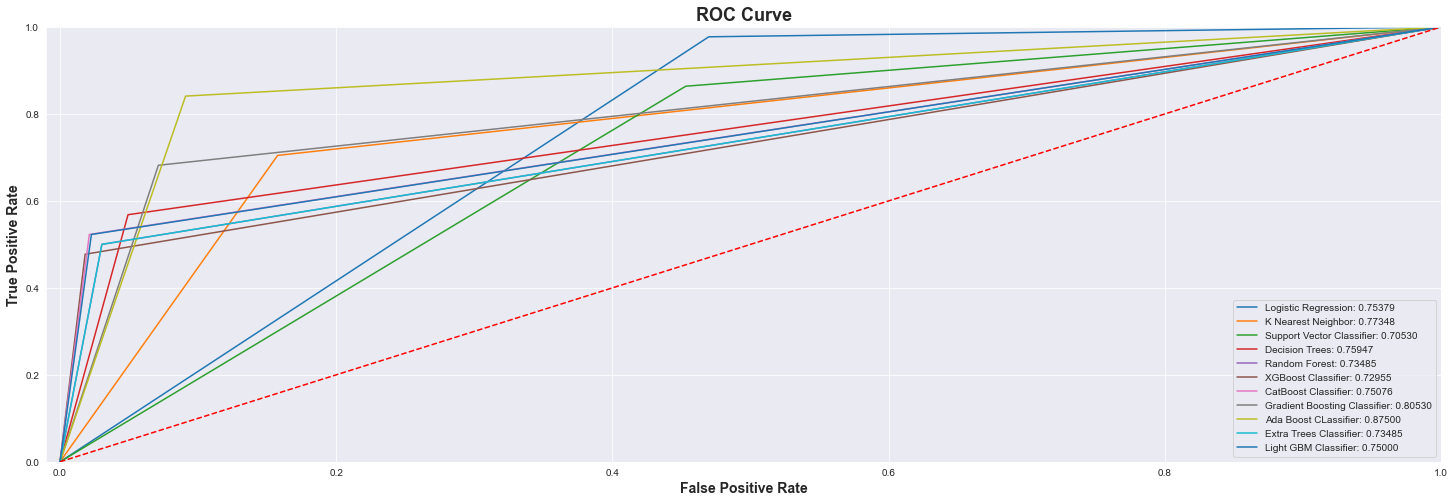

In [76]:
# ROC CURVE

fig, ax = plt.subplots()
fig.set_size_inches(25,8)

m = 0
for i in model_predictions:
    fpr, tpr, thresholds_nb = roc_curve(y_test, i, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, i,pos_label=1)
    plt.plot(fpr, tpr, label= model_names[m] + ': {:.5f}'.format(roc_auc_score(y_test, i)))
    m+=1
plt.plot([0, 1], [0, 1], 'r--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

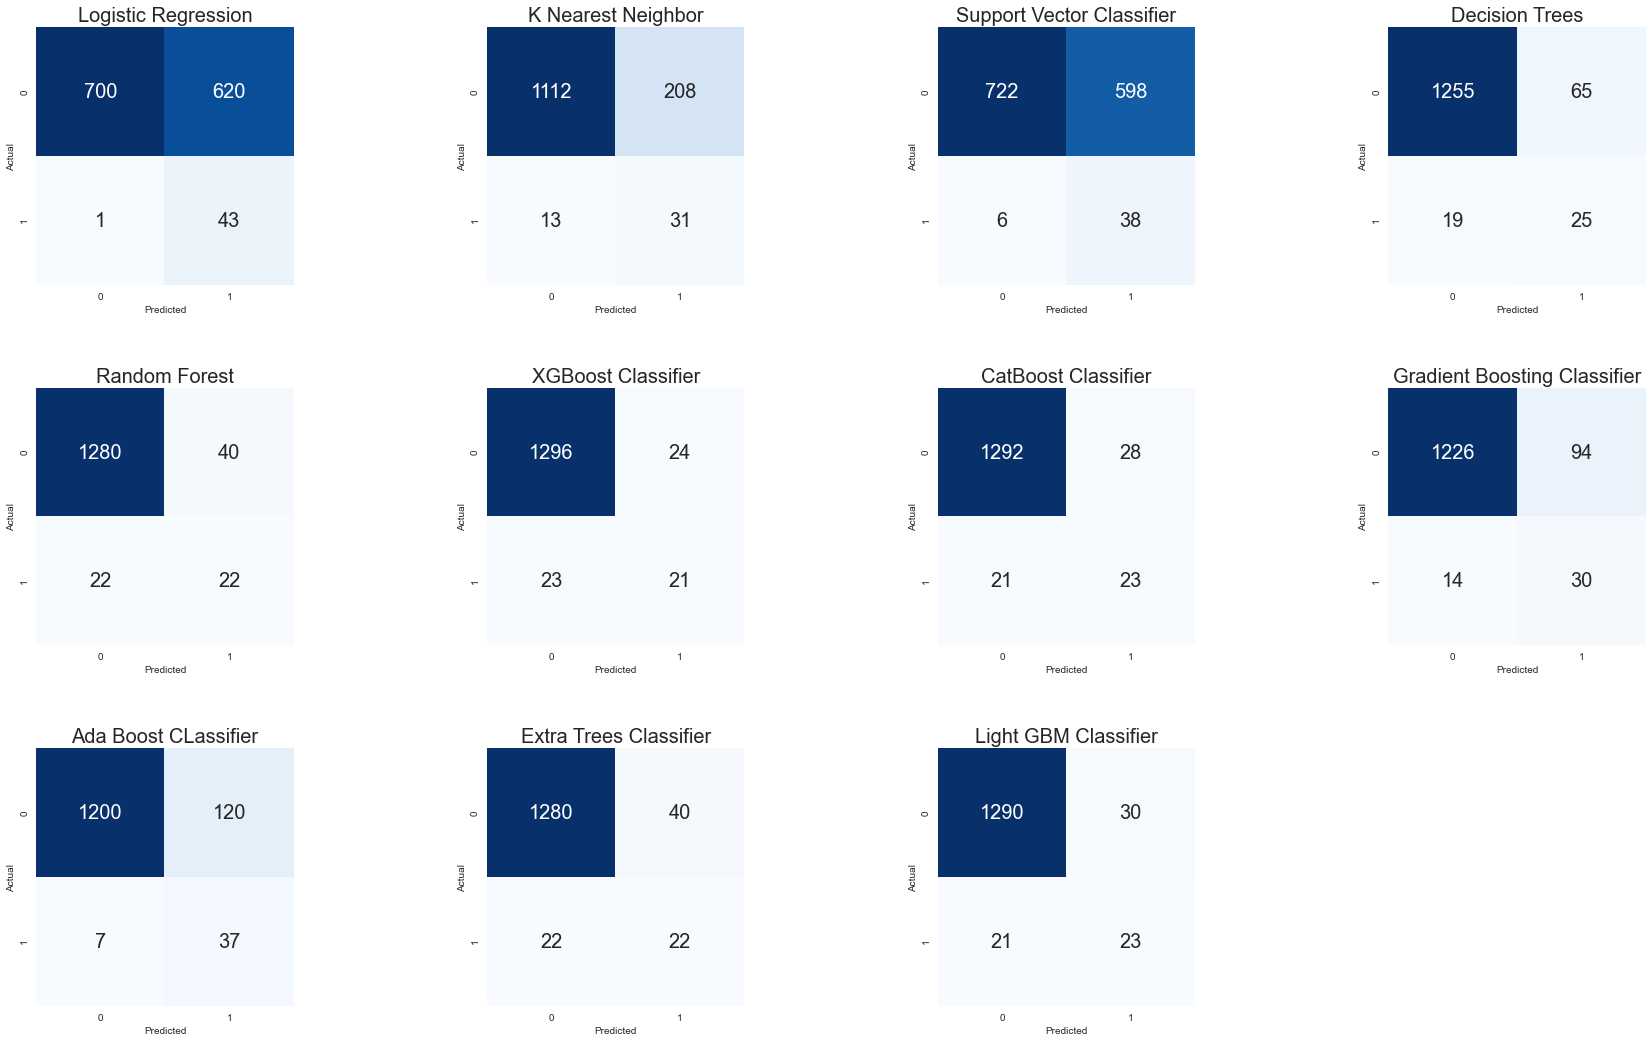

In [77]:
# Plotting the confusion matrix for each classifier

fig = plt.figure(figsize=(30, 18))

m = 0
c = 1
for i in model_predictions:
    model = model_names[m]
    m += 1

    conf_mx = confusion_matrix(y_test, i)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(3, 4, c)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm, annot=True, fmt='.0f',square=True, cbar=False, annot_kws={"size": 20}, cmap ='Blues').set_title(model, fontsize = 20)
    c = c + 1

plt.show()

In [78]:
models_precision = [precision_score(y_test,i) for i in model_predictions]    
models_recall = [recall_score(y_test,i) for i in model_predictions]  
models_f1score = [f1_score(y_test,i) for i in model_predictions]  
models_accuracy_score = [accuracy_score(y_test,i) for i in model_predictions]  

allmodels = pd.DataFrame({'Models':model_names,'Precision Score':models_precision,'Recall Score':models_recall,
                         'F1 Score':models_f1score,'Accuracy Score':models_accuracy_score})

######  Top Performing Models Based on F1 Score

In [79]:
allmodels.sort_values(by='F1 Score',ascending=False)

,Models,Precision Score,Recall Score,F1 Score,Accuracy Score
6,CatBoost Classifier,0.450980,0.522727,0.484211,0.964076
10,Light GBM Classifier,0.433962,0.522727,0.474227,0.962610
5,XGBoost Classifier,0.466667,0.477273,0.471910,0.965543
4,Random Forest,0.354839,0.500000,0.415094,0.954545
9,Extra Trees Classifier,0.354839,0.500000,0.415094,0.954545
3,Decision Trees,0.277778,0.568182,0.373134,0.938416
8,Ada Boost CLassifier,0.235669,0.840909,0.368159,0.906891
7,Gradient Boosting Classifier,0.241935,0.681818,0.357143,0.920821
1,K Nearest Neighbor,0.129707,0.704545,0.219081,0.837977
0,Logistic Regression,0.064857,0.977273,0.121641,0.544721


######  Top Performing Models Based on Recall

In [80]:
allmodels.sort_values(by='Recall Score',ascending=False)

,Models,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logistic Regression,0.064857,0.977273,0.121641,0.544721
2,Support Vector Classifier,0.059748,0.863636,0.111765,0.557185
8,Ada Boost CLassifier,0.235669,0.840909,0.368159,0.906891
1,K Nearest Neighbor,0.129707,0.704545,0.219081,0.837977
7,Gradient Boosting Classifier,0.241935,0.681818,0.357143,0.920821
3,Decision Trees,0.277778,0.568182,0.373134,0.938416
6,CatBoost Classifier,0.450980,0.522727,0.484211,0.964076
10,Light GBM Classifier,0.433962,0.522727,0.474227,0.962610
4,Random Forest,0.354839,0.500000,0.415094,0.954545
9,Extra Trees Classifier,0.354839,0.500000,0.415094,0.954545


######  Top Performing Models Based on Precision

In [81]:
allmodels.sort_values(by='Precision Score',ascending=False)

,Models,Precision Score,Recall Score,F1 Score,Accuracy Score
5,XGBoost Classifier,0.466667,0.477273,0.471910,0.965543
6,CatBoost Classifier,0.450980,0.522727,0.484211,0.964076
10,Light GBM Classifier,0.433962,0.522727,0.474227,0.962610
4,Random Forest,0.354839,0.500000,0.415094,0.954545
9,Extra Trees Classifier,0.354839,0.500000,0.415094,0.954545
3,Decision Trees,0.277778,0.568182,0.373134,0.938416
7,Gradient Boosting Classifier,0.241935,0.681818,0.357143,0.920821
8,Ada Boost CLassifier,0.235669,0.840909,0.368159,0.906891
1,K Nearest Neighbor,0.129707,0.704545,0.219081,0.837977
0,Logistic Regression,0.064857,0.977273,0.121641,0.544721


#### Conclusion

When dealing with imbalanced datasets, accuracy may not be a reliable measure of the performance of the model. For this prediction, the focus should be on the precision or recall.

Precision would be more useful in this case where correctly identifying companies that are not bankrupt is of higher concern. Recall, on the other hand, is more useful if correctly identifying companies that bankrupt is of a higher concern. Usually, there is a trade off between precision and recall.

If it is more important that the model identifies Bankrupty compares, then we could choose Logistic Regression, however, that comes at the cost of incorrectly labelling a lot of stable companies as bankrupt. The Ada Boost Classifier gives a better precision, but at the cost of a less recall perfomance


The choice of the best performing model depends on how much trade off between precision and recall the user of the model is willing to allow

###### Improving the Model Perfomance

There may be some opportunities to improve the performance of the model such as experimenting with different synthetic data genration methods that may better handle the imbalanced data or trying other machine learning classification algorithms.

The best path to improving the model performance is probably by obtaining more real-world data on bankrupt, or near-bankrupt companies to rebalance the dataset